clear the cache and start afresh!

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

#### Import relevant libraries

In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import logging
import sys
from sklearn.linear_model import LinearRegression
import seaborn as sns 
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import svm

In [3]:
history = pd.read_csv("sm_transaction_history.csv", sep='";"', delimiter=';""')

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
# history

In [5]:
new_history = history.replace({'"':'',',':''}, regex=True)

In [6]:
new_history['mca_receipt_no""']

0         2014-06-02 14:17:16
1         2014-06-02 14:30:45
2         2014-06-02 15:17:40
3         2014-06-02 15:23:31
4         2014-06-02 15:25:13
                 ...         
135858    2021-04-13 12:20:03
135859    2021-04-13 12:45:03
135860    2021-04-13 13:20:04
135861    2021-04-13 14:50:04
135862    2021-04-13 15:10:03
Name: mca_receipt_no"", Length: 135863, dtype: object

In [7]:
new_history.columns = ['transaction_date', 'transaction_id', 'receipt_no', 'teller_id',
       'batch_number', 'provider_id', 'transaction_amount',
       'total_provider_amount', 'commission', 'vat', 'currency',
       'mode_of_payt', 'pay_ref_no', 'slip_no', 'drawers_bank',
       'transaction_status', 'mca_receipt_no', 'auto_active_retry',
       'active_return_msg', 'handled_by', 'handled_at']

In [8]:
new_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135863 entries, 0 to 135862
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   transaction_date       135863 non-null  object
 1   transaction_id         135851 non-null  object
 2   receipt_no             135849 non-null  object
 3   teller_id              135835 non-null  object
 4   batch_number           135835 non-null  object
 5   provider_id            135835 non-null  object
 6   transaction_amount     135835 non-null  object
 7   total_provider_amount  135835 non-null  object
 8   commission             135835 non-null  object
 9   vat                    135835 non-null  object
 10  currency               135835 non-null  object
 11  mode_of_payt           135835 non-null  object
 12  pay_ref_no             135835 non-null  object
 13  slip_no                135718 non-null  object
 14  drawers_bank           135835 non-null  object
 15  

In [9]:
new_history

transaction_date transaction_id   receipt_no  teller_id  \
0       2014-06-02 13:28:16      401400001  10201400001  140602001   
1       2014-06-02 13:34:17      401400002  10201400002  140602003   
2       2014-06-02 15:06:19      401400003  10201400003  140602006   
3       2014-06-02 15:12:42      401400004  10201400004  140602006   
4       2014-06-02 15:18:13      401400005  10201400005  140602008   
...                     ...            ...          ...        ...   
135858  2021-04-13 12:12:40      401535832  10201535832  140602001   
135859  2021-04-13 12:38:50      401535833  10201535833  140602240   
135860  2021-04-13 13:14:30      401535834  10201535834  140602283   
135861  2021-04-13 14:42:38      401535835  10201535835  140602297   
135862  2021-04-13 15:04:18      401535836  10201535836  140602283   

       batch_number provider_id transaction_amount total_provider_amount  \
0                 6           1          135300.00                   119   
1                 1           3           53000.00                 46892   
2                 3           3           53000.00                 46892   
3                 3           3           52500.00                 46468   
4                 8           3           16000.00                     0   
...             ...         ...                ...                   ...   
135858        12500           1           44500.00                    36   
135859        12460           1          100500.00                    82   
135860        12502           1           40000.00                    32   
135861        12498           1           31000.00                    25   
135862        12502           1          100500.00                    82   

       commission vat  ...      mode_of_payt pay_ref_no slip_no drawers_bank  \
0         2890.00   0  ...      1;NULL;;NULL  activated       0       0;NULL   
1          779.00   0  ...      1;NULL;;NULL  activated       0       0;NULL   
2          779.00   0  ...      1;NULL;;NULL  activated       0       0;NULL   
3          254.00   0  ...      1;NULL;;NULL  activated       0       0;NULL   
4          542.00   0  ...      1;NULL;;NULL  activated       0       0;NULL   
...           ...  ..  ...               ...        ...     ...          ...   
135858    1041.00   0  ...  1;NULL;NULL;NULL  activated  165906       0;NULL   
135859    3526.00   0  ...  1;NULL;NULL;NULL  activated  165912       0;NULL   
135860     869.00   0  ...  1;NULL;NULL;NULL  activated  165895       0;NULL   
135861       0.00   0  ...  1;NULL;NULL;NULL  activated  165967       0;NULL   
135862    3526.00   0  ...  1;NULL;NULL;NULL  activated  165972       0;NULL   

       transaction_status       mca_receipt_no auto_active_retry  \
0             31052014007  2014-06-02 14:17:16              None   
1             31052014007  2014-06-02 14:30:45              None   
2             31052014007  2014-06-02 15:17:40              None   
3             31052014007  2014-06-02 15:23:31              None   
4             31052014005  2014-06-02 15:25:13              None   
...                   ...                  ...               ...   
135858            AUTOACT  2021-04-13 12:20:03              None   
135859            AUTOACT  2021-04-13 12:45:03              None   
135860            AUTOACT  2021-04-13 13:20:04              None   
135861            AUTOACT  2021-04-13 14:50:04              None   
135862            AUTOACT  2021-04-13 15:10:03              None   

       active_return_msg handled_by handled_at  
0                   None       None       None  
1                   None       None       None  
2                   None       None       None  
3                   None       None       None  
4                   None       None       None  
...                  ...        ...        ...  
135858              None       None       None  
135859              None       None       None  
135860              None       None   

In [10]:
new_history['vat'] =new_history['vat'].replace({'0;':'0'})

####
transaction_id
recept_id, mode_of_payt,slip_no,transaction_status,mca_receipt_no, active_return_msg, handled_at

In [11]:
new_history['total_provider_amount'] =new_history['total_provider_amount'].astype(float)
new_history['teller_id'] =new_history['teller_id'].astype(float).round()
new_history['provider_id'] =new_history['provider_id'].astype(float)
new_history['batch_number'] =new_history['batch_number'].astype(float)
new_history['transaction_amount'] =new_history['transaction_amount'].astype(float)
new_history['total_provider_amount'] =new_history['total_provider_amount'].astype(float)
new_history['commission'] =new_history['commission'].astype(float)
new_history['vat'] =new_history['vat'].astype(float).round()

In [86]:
#drop transaction_id with nan values and duplicates
new_history = new_history[new_history['transaction_id'].notna()]
# new_history = new_history.drop_duplicates(subset='transaction_id', keep='first' )

In [87]:


np.set_printoptions(threshold=sys.maxsize)



In [88]:
new_history['mode_of_payt'] 

0             1;NULL;;NULL
1             1;NULL;;NULL
2             1;NULL;;NULL
3             1;NULL;;NULL
4             1;NULL;;NULL
                ...       
135858    1;NULL;NULL;NULL
135859    1;NULL;NULL;NULL
135860    1;NULL;NULL;NULL
135861    1;NULL;NULL;NULL
135862    1;NULL;NULL;NULL
Name: mode_of_payt, Length: 135840, dtype: object

what does currency 1 represent? How about 0;NULL;NULL;
What does slip_no mean? values: '0', '157285', '157305', 'Tele10 Limited(04), '0;NULL','canceled', 'activated'
What does drawers_bank mean? values: , '0', '0;NULL', '3625004',
transaction_status with values '31052014008',  'activated','not found', '0;NULL', 'AUTOACT',
Values expected for mca_receipt_no; dates?  '2021-03-15 12:20:04', '155009', '0;NULL',None
Values expected for auto_active_retry?'2014-06-03 08:48:26', None,'31052014006', None,'0;NULL',
????
 None, None, None, None, None,
Values expected for active_return_msg , 'AUTOACT', '31052014301, , '0;NULL', , '2015-07-15 18:13:34'
Values expected for handled_by; , None, '2019-03-06 09:30:07', 

# orders

In [89]:
orders = pd.read_csv("sm_subscriber_orders.csv")
orders

oder_id  transaction_id transaction_date transaction_type  \
0             1       401400001   6/2/2014 13:28        equipment   
1             2       401400001   6/2/2014 13:28        equipment   
2             3       401400002   6/2/2014 13:34        equipment   
3             4       401400002   6/2/2014 13:34        equipment   
4             5       401400003   6/2/2014 15:06        equipment   
...         ...             ...              ...              ...   
178072   178073       401535894  4/19/2021 15:55        equipment   
178073   178074       401535895  4/19/2021 15:58     subscription   
178074   178075       401535896  4/19/2021 16:03     subscription   
178075   178076       401535897  4/19/2021 16:26        equipment   
178076   178077       401535897  4/19/2021 16:26        equipment   

       account_number  provider_id  product_id  duration  product_price  \
0          4288697398            1          15         1          61300   
1          4288697398            1           5         1          74000   
2         1.40473E+11            3          28         1          30000   
3         1.40473E+11            3          26         1          23000   
4         1.40473E+11            3          28         1          30000   
...               ...          ...         ...       ...            ...   
178072     7038170946            1         nan         1              0   
178073    10209427870            1           3         1          31000   
178074     7030859481            1           1         1          14700   
178075     7038235643            1          13         1              0   
178076     7038235643            1         nan         1              0   

        provider_price  
0                   35  
1                   84  
2                27400  
3                19492  
4                27400  
...                ...  
178072               0  
178073              25  
178074              12  
178075               8  
178076               0  

[178077 rows x 10 columns]

In [90]:
orders

oder_id  transaction_id transaction_date transaction_type  \
0             1       401400001   6/2/2014 13:28        equipment   
1             2       401400001   6/2/2014 13:28        equipment   
2             3       401400002   6/2/2014 13:34        equipment   
3             4       401400002   6/2/2014 13:34        equipment   
4             5       401400003   6/2/2014 15:06        equipment   
...         ...             ...              ...              ...   
178072   178073       401535894  4/19/2021 15:55        equipment   
178073   178074       401535895  4/19/2021 15:58     subscription   
178074   178075       401535896  4/19/2021 16:03     subscription   
178075   178076       401535897  4/19/2021 16:26        equipment   
178076   178077       401535897  4/19/2021 16:26        equipment   

       account_number  provider_id  product_id  duration  product_price  \
0          4288697398            1          15         1          61300   
1          4288697398            1           5         1          74000   
2         1.40473E+11            3          28         1          30000   
3         1.40473E+11            3          26         1          23000   
4         1.40473E+11            3          28         1          30000   
...               ...          ...         ...       ...            ...   
178072     7038170946            1         nan         1              0   
178073    10209427870            1           3         1          31000   
178074     7030859481            1           1         1          14700   
178075     7038235643            1          13         1              0   
178076     7038235643            1         nan         1              0   

        provider_price  
0                   35  
1                   84  
2                27400  
3                19492  
4                27400  
...                ...  
178072               0  
178073              25  
178074              12  
178075               8  
178076               0  

[178077 rows x 10 columns]

In [91]:
orders.describe()

oder_id  transaction_id  provider_id  product_id  duration  \
count   178077          178077       178077      174280    178073   
mean     89039       401467885            1          20         1   
std      51407           39028            1          30         1   
min          1       401400001            0           1         0   
25%      44520       401434386            1           4         1   
50%      89039       401468025            1           5         1   
75%     133558       401501582            1          21         1   
max     178077       401535897            3         176        12   

       product_price  provider_price  
count         178077          178077  
mean           41512            2208  
std            32528            7873  
min                0               0  
25%            13800              12  
50%            28700              31  
75%            64000              82  
max           250000          200000

In [92]:
orders['transaction_id'].duplicated().any()

True

In [93]:
dups = orders[orders['transaction_id'].duplicated()]
dups

oder_id  transaction_id transaction_date transaction_type  \
1             2       401400001   6/2/2014 13:28        equipment   
3             4       401400002   6/2/2014 13:34        equipment   
5             6       401400003   6/2/2014 15:06        equipment   
7             8       401400004   6/2/2014 15:12        equipment   
10           11       401400006   6/2/2014 15:23        equipment   
...         ...             ...              ...              ...   
178059   178060       401535884  4/19/2021 12:08     subscription   
178060   178061       401535884  4/19/2021 12:08     subscription   
178062   178063       401535885  4/19/2021 13:00     subscription   
178072   178073       401535894  4/19/2021 15:55        equipment   
178076   178077       401535897  4/19/2021 16:26        equipment   

       account_number  provider_id  product_id  duration  product_price  \
1          4288697398            1           5         1          74000   
3         1.40473E+11            3          26         1          23000   
5         1.40473E+11            3          26         1          23000   
7         1.40473E+11            3          19         3           7500   
10        1.40473E+11            3          19         1           7500   
...               ...          ...         ...       ...            ...   
178059     4290985297            1          72         1          14700   
178060     4290985297            1           5         1         100500   
178062     7016792320            1           3         1          31000   
178072     7038170946            1         nan         1              0   
178076     7038235643            1         nan         1              0   

        provider_price  
1                   84  
3                19492  
5                19492  
7                 6356  
10                6356  
...                ...  
178059              12  
178060              82  
178062              25  
178072               0  
178076               0  

[42688 rows x 10 columns]

# connecting two datasets

In [94]:
orders["transaction_id"] = orders["transaction_id"].astype(str)

In [95]:
merged_data = pd.merge(orders,new_history,on=['transaction_id',"transaction_id"],how='left')

In [96]:
merged_data['oder_id']

0              1
1              2
2              3
3              4
4              5
           ...  
178072    178073
178073    178074
178074    178075
178075    178076
178076    178077
Name: oder_id, Length: 178077, dtype: int64

In [97]:
merged_data = merged_data[merged_data['transaction_type'] == 'subscription']
merged_data = merged_data[(merged_data['transaction_status'] == 'activated') | (merged_data['transaction_status'] == 'AUTACT')]

In [98]:
merged_data

oder_id transaction_id transaction_date_x transaction_type  \
970         971      401400699    6/10/2014 18:26     subscription   
24594     24595      401418832   10/27/2014 13:56     subscription   
24885     24886      401419060    10/30/2014 9:15     subscription   
24886     24887      401419060    10/30/2014 9:15     subscription   
24887     24888      401419061    10/30/2014 9:16     subscription   
...         ...            ...                ...              ...   
177678   177679      401535591     4/5/2021 12:02     subscription   
177682   177683      401535595     4/5/2021 12:27     subscription   
177683   177684      401535596     4/5/2021 12:28     subscription   
177703   177704      401535608     4/5/2021 15:18     subscription   
177725   177726      401535627     4/6/2021 12:58     subscription   

       account_number  provider_id_x  product_id  duration  product_price  \
970        4273812223              1           2         1          19400   
24594      4254105805              1           3         1          26500   
24885      4288697408              1          42         1          13200   
24886      4288697408              1           3         1          26500   
24887      4105035204              1           3         1          26500   
...               ...            ...         ...       ...            ...   
177678     1045938785              1           5         1         100500   
177682    10459812008              1           5         1         100500   
177683    10209687929              1           3        11          31000   
177703    10459639935              1           3         1          31000   
177725    10254723348              1           3         1          31000   

        provider_price  ...  mode_of_payt   pay_ref_no             slip_no  \
970                 22  ...  1;NULL;;NULL     canceled                   0   
24594               30  ...             6           11                  11   
24885               15  ...             6        13083  Tele10 Limited(04)   
24886               30  ...             6        13083  Tele10 Limited(04)   
24887               30  ...             6        12980  Tele10 Limited(04)   
...                ...  ...           ...          ...                 ...   
177678              82  ...             6  g98eg8d9f*/  Tele10 Limited(04)   
177682              82  ...             6    fg35d5g65  Tele10 Limited(04)   
177683              25  ...             6    yr656u68t  Tele10 Limited(04)   
177703              25  ...             6       5g656f  Tele10 Limited(04)   
177725              25  ...             6  y4rey49r4y9  Tele10 Limited(04)   

        drawers_bank  transaction_status  mca_receipt_no    auto_active_retry  \
970                0           activated     31052014005  2014-06-13 09:54:13   
24594            405           activated         7188445               0;NULL   
24885            405           activated         7296069               0;NULL   
24886            405           activated         7296069               0;NULL   
24887            405           activated         7296071               0;NULL   
...              ...                 ...             ...                  ...   
177678           405           activated          162661               0;NULL   
177682           404           activated          162670               0;NULL   
177683           404           activated               0               0;NULL   
177703           405           activated          162709               0;NULL   
177725           405           activated          162990               0;NULL   

        active_return_msg           handled_by handled_at  
970                  None                 None       None  
24594             AUTOACT  2014-10-27 14:35:48       None  
24885             AUTOACT  2014-10-30 09:25:04       None  
24886             AUTOACT  2014-10-30 09:25:04       None  
24887             AUTOACT  2014-

In [99]:
merged_data['transaction_id'] =merged_data['transaction_id'].astype(float).round()

In [100]:
merged_data

oder_id  transaction_id transaction_date_x transaction_type  \
970         971       401400699    6/10/2014 18:26     subscription   
24594     24595       401418832   10/27/2014 13:56     subscription   
24885     24886       401419060    10/30/2014 9:15     subscription   
24886     24887       401419060    10/30/2014 9:15     subscription   
24887     24888       401419061    10/30/2014 9:16     subscription   
...         ...             ...                ...              ...   
177678   177679       401535591     4/5/2021 12:02     subscription   
177682   177683       401535595     4/5/2021 12:27     subscription   
177683   177684       401535596     4/5/2021 12:28     subscription   
177703   177704       401535608     4/5/2021 15:18     subscription   
177725   177726       401535627     4/6/2021 12:58     subscription   

       account_number  provider_id_x  product_id  duration  product_price  \
970        4273812223              1           2         1          19400   
24594      4254105805              1           3         1          26500   
24885      4288697408              1          42         1          13200   
24886      4288697408              1           3         1          26500   
24887      4105035204              1           3         1          26500   
...               ...            ...         ...       ...            ...   
177678     1045938785              1           5         1         100500   
177682    10459812008              1           5         1         100500   
177683    10209687929              1           3        11          31000   
177703    10459639935              1           3         1          31000   
177725    10254723348              1           3         1          31000   

        provider_price  ...  mode_of_payt   pay_ref_no             slip_no  \
970                 22  ...  1;NULL;;NULL     canceled                   0   
24594               30  ...             6           11                  11   
24885               15  ...             6        13083  Tele10 Limited(04)   
24886               30  ...             6        13083  Tele10 Limited(04)   
24887               30  ...             6        12980  Tele10 Limited(04)   
...                ...  ...           ...          ...                 ...   
177678              82  ...             6  g98eg8d9f*/  Tele10 Limited(04)   
177682              82  ...             6    fg35d5g65  Tele10 Limited(04)   
177683              25  ...             6    yr656u68t  Tele10 Limited(04)   
177703              25  ...             6       5g656f  Tele10 Limited(04)   
177725              25  ...             6  y4rey49r4y9  Tele10 Limited(04)   

        drawers_bank  transaction_status  mca_receipt_no    auto_active_retry  \
970                0           activated     31052014005  2014-06-13 09:54:13   
24594            405           activated         7188445               0;NULL   
24885            405           activated         7296069               0;NULL   
24886            405           activated         7296069               0;NULL   
24887            405           activated         7296071               0;NULL   
...              ...                 ...             ...                  ...   
177678           405           activated          162661               0;NULL   
177682           404           activated          162670               0;NULL   
177683           404           activated               0               0;NULL   
177703           405           activated          162709               0;NULL   
177725           405           activated          162990               0;NULL   

        active_return_msg           handled_by handled_at  
970                  None                 None       None  
24594             AUTOACT  2014-10-27 14:35:48       None  
24885             AUTOACT  2014-10-30 09:25:04       None  
24886             AUTOACT  2014-10-30 09:25:04       None  
24887             AU

In [101]:
merged_data.columns

Index(['oder_id', 'transaction_id', 'transaction_date_x', 'transaction_type',
       'account_number', 'provider_id_x', 'product_id', 'duration',
       'product_price', 'provider_price', 'transaction_date_y', 'receipt_no',
       'teller_id', 'batch_number', 'provider_id_y', 'transaction_amount',
       'total_provider_amount', 'commission', 'vat', 'currency',
       'mode_of_payt', 'pay_ref_no', 'slip_no', 'drawers_bank',
       'transaction_status', 'mca_receipt_no', 'auto_active_retry',
       'active_return_msg', 'handled_by', 'handled_at'],
      dtype='object')

In [103]:
merged_data = merged_data[['transaction_date_y', 'transaction_id', 'receipt_no', 'teller_id',
       'batch_number','provider_id_y', 'transaction_amount',
       'total_provider_amount', 'commission', 'vat', 'currency',
       'mode_of_payt', 'pay_ref_no', 'slip_no', 'drawers_bank',
       'transaction_status', 'mca_receipt_no', 'auto_active_retry',
       'active_return_msg', 'handled_by', 'handled_at', 'oder_id',
        'transaction_type', 'account_number',
        'product_id', 'duration', 'product_price',
       'provider_price']]

In [104]:
merged_data.columns = ['transaction_date', 'transaction_id', 'receipt_no', 'teller_id',
       'batch_number','provider_id', 'transaction_amount',
       'total_provider_amount', 'commission', 'vat', 'currency',
       'mode_of_payt', 'pay_ref_no', 'slip_no', 'drawers_bank',
       'transaction_status', 'mca_receipt_no', 'auto_active_retry',
       'active_return_msg', 'handled_by', 'handled_at', 'oder_id',
        'transaction_type', 'account_number',
        'product_id', 'duration', 'product_price',
       'provider_price']

In [105]:
merged_data

transaction_date  transaction_id   receipt_no  teller_id  \
970     2014-06-10 18:26:23       401400699  10201400699  140602043   
24594   2014-10-27 13:56:59       401418832  10201418832  140602016   
24885   2014-10-30 09:15:29       401419060  10201419060  140602017   
24886   2014-10-30 09:15:29       401419060  10201419060  140602017   
24887   2014-10-30 09:16:23       401419061  10201419061  140602017   
...                     ...             ...          ...        ...   
177678  2021-04-05 12:02:06       401535591  10201535591  140602043   
177682  2021-04-05 12:27:46       401535595  10201535595  140602043   
177683  2021-04-05 12:28:28       401535596  10201535596  140602043   
177703  2021-04-05 15:18:59       401535608  10201535608  140602043   
177725  2021-04-06 12:58:04       401535627  10201535627  140602043   

        batch_number  provider_id  transaction_amount  total_provider_amount  \
970              102            1               19400                     22   
24594           1678            1               26500                     30   
24885           1745            1               39700                     45   
24886           1745            1               39700                     45   
24887           1745            1               26500                     30   
...              ...          ...                 ...                    ...   
177678         12440            1              152200                    124   
177682         12440            1              100500                     82   
177683         12440            1              341000                    275   
177703         12440            1               31000                     25   
177725         12440            1               31000                     25   

        commission  vat  ... active_return_msg           handled_by  \
970            757    0  ...              None                 None   
24594         1035    0  ...           AUTOACT  2014-10-27 14:35:48   
24885         1550    0  ...           AUTOACT  2014-10-30 09:25:04   
24886         1550    0  ...           AUTOACT  2014-10-30 09:25:04   
24887         1035    0  ...           AUTOACT  2014-10-30 09:25:08   
...            ...  ...  ...               ...                  ...   
177678        5332    0  ...           AUTOACT  2021-04-05 12:10:07   
177682        3526    0  ...           AUTOACT  2021-04-05 12:35:03   
177683         568    0  ...       31052014301  2021-04-05 12:28:57   
177703         568    0  ...           AUTOACT  2021-04-05 15:25:03   
177725           0    0  ...           AUTOACT  2021-04-06 13:05:03   

       handled_at oder_id transaction_type account_number product_id duration  \
970          None     971     subscription     4273812223          2        1   
24594        None   24595     subscription     4254105805          3        1   
24885        None   24886     subscription     4288697408         42        1   
24886        None   24887     subscription     4288697408          3        1   
24887        None   24888     subscription     4105035204          3        1   
...           ...     ...              ...            ...        ...      ...   
177678       None  177679     subscription     1045938785          5        1   
177682       None  177683     subscription    10459812008          5        1   
177683       None  177684     subscription    10209687929          3       11   
177703       None  177704     subscription    10459639935          3        1   
177725       None  177726     subscription    10254723348          3        1   

       product_price provider_price  
970            19400             22  
24594          26500             30  
24885          13200             15  
24886          26500             30  
24887          26500             30  
...              ...            ...  
177678        100500             82  
177682        100500             82  
177683         31000         

In [108]:
merged_data['teller_id'] =merged_data['teller_id'].astype(float).round()

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
merged_data['transaction_amount'] =merged_data['transaction_amount'].astype(float).round()

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
merged_data

transaction_date  transaction_id   receipt_no  teller_id  \
970     2014-06-10 18:26:23       401400699  10201400699  140602043   
24594   2014-10-27 13:56:59       401418832  10201418832  140602016   
24885   2014-10-30 09:15:29       401419060  10201419060  140602017   
24886   2014-10-30 09:15:29       401419060  10201419060  140602017   
24887   2014-10-30 09:16:23       401419061  10201419061  140602017   
...                     ...             ...          ...        ...   
177678  2021-04-05 12:02:06       401535591  10201535591  140602043   
177682  2021-04-05 12:27:46       401535595  10201535595  140602043   
177683  2021-04-05 12:28:28       401535596  10201535596  140602043   
177703  2021-04-05 15:18:59       401535608  10201535608  140602043   
177725  2021-04-06 12:58:04       401535627  10201535627  140602043   

        batch_number  provider_id  transaction_amount  total_provider_amount  \
970              102            1               19400                     22   
24594           1678            1               26500                     30   
24885           1745            1               39700                     45   
24886           1745            1               39700                     45   
24887           1745            1               26500                     30   
...              ...          ...                 ...                    ...   
177678         12440            1              152200                    124   
177682         12440            1              100500                     82   
177683         12440            1              341000                    275   
177703         12440            1               31000                     25   
177725         12440            1               31000                     25   

        commission  vat  ... active_return_msg           handled_by  \
970            757    0  ...              None                 None   
24594         1035    0  ...           AUTOACT  2014-10-27 14:35:48   
24885         1550    0  ...           AUTOACT  2014-10-30 09:25:04   
24886         1550    0  ...           AUTOACT  2014-10-30 09:25:04   
24887         1035    0  ...           AUTOACT  2014-10-30 09:25:08   
...            ...  ...  ...               ...                  ...   
177678        5332    0  ...           AUTOACT  2021-04-05 12:10:07   
177682        3526    0  ...           AUTOACT  2021-04-05 12:35:03   
177683         568    0  ...       31052014301  2021-04-05 12:28:57   
177703         568    0  ...           AUTOACT  2021-04-05 15:25:03   
177725           0    0  ...           AUTOACT  2021-04-06 13:05:03   

       handled_at oder_id transaction_type account_number product_id duration  \
970          None     971     subscription     4273812223          2        1   
24594        None   24595     subscription     4254105805          3        1   
24885        None   24886     subscription     4288697408         42        1   
24886        None   24887     subscription     4288697408          3        1   
24887        None   24888     subscription     4105035204          3        1   
...           ...     ...              ...            ...        ...      ...   
177678       None  177679     subscription     1045938785          5        1   
177682       None  177683     subscription    10459812008          5        1   
177683       None  177684     subscription    10209687929          3       11   
177703       None  177704     subscription    10459639935          3        1   
177725       None  177726     subscription    10254723348          3        1   

       product_price provider_price  
970            19400             22  
24594          26500             30  
24885          13200             15  
24886          26500             30  
24887          26500             30  
...              ...            ...  
177678        100500             82  
177682        100500             82  
177683         31000         

[, 'receipt_no','batch_number', 'currency',
       'mode_of_payt', 'pay_ref_no', 'slip_no', 'drawers_bank',
       'transaction_status', 'mca_receipt_no', 'auto_active_retry',
       'active_return_msg', 'handled_by', 'handled_at', 'oder_id',
        'transaction_type',
        'product_id', 'duration', 'product_price',
       'provider_price']

In [111]:
cleaned_data = merged_data[['transaction_date', 'transaction_id', 'teller_id',
       'provider_id', 'transaction_amount',
       'total_provider_amount', 'commission', 'vat',
         'account_number',
        'product_id','oder_id', 'duration', 'product_price',
       'provider_price']]
cleaned_data.reset_index(drop=True)

transaction_date  transaction_id  teller_id  provider_id  \
0      2014-06-10 18:26:23       401400699  140602043            1   
1      2014-10-27 13:56:59       401418832  140602016            1   
2      2014-10-30 09:15:29       401419060  140602017            1   
3      2014-10-30 09:15:29       401419060  140602017            1   
4      2014-10-30 09:16:23       401419061  140602017            1   
...                    ...             ...        ...          ...   
84977  2021-04-05 12:02:06       401535591  140602043            1   
84978  2021-04-05 12:27:46       401535595  140602043            1   
84979  2021-04-05 12:28:28       401535596  140602043            1   
84980  2021-04-05 15:18:59       401535608  140602043            1   
84981  2021-04-06 12:58:04       401535627  140602043            1   

       transaction_amount  total_provider_amount  commission  vat  \
0                   19400                     22         757    0   
1                   26500                     30        1035    0   
2                   39700                     45        1550    0   
3                   39700                     45        1550    0   
4                   26500                     30        1035    0   
...                   ...                    ...         ...  ...   
84977              152200                    124        5332    0   
84978              100500                     82        3526    0   
84979              341000                    275         568    0   
84980               31000                     25         568    0   
84981               31000                     25           0    0   

      account_number  product_id  oder_id  duration  product_price  \
0         4273812223           2      971         1          19400   
1         4254105805           3    24595         1          26500   
2         4288697408          42    24886         1          13200   
3         4288697408           3    24887         1          26500   
4         4105035204           3    24888         1          26500   
...              ...         ...      ...       ...            ...   
84977     1045938785           5   177679         1         100500   
84978    10459812008           5   177683         1         100500   
84979    10209687929           3   177684        11          31000   
84980    10459639935           3   177704         1          31000   
84981    10254723348           3   177726         1          31000   

       provider_price  
0                  22  
1                  30  
2                  15  
3                  30  
4                  30  
...               ...  
84977              82  
84978              82  
84979              25  
84980              25  
84981              25  

[84982 rows x 14 columns]

In [113]:
# cleaned_data.loc['account_number'] =cleaned_data['account_number'].astype(float)

  
try:
    cleaned_data['account_number'] = pd.to_numeric(cleaned_data['account_number']) 
except ValueError:
    # I want to register on my log the message recived on ORIGINAL VALUE
    mask = pd.to_numeric(cleaned_data['account_number'].fillna('0'), errors='coerce').isna() 
    L = cleaned_data.loc[mask, 'account_number']
#     for val in L:
    cleaned_data.drop(L.index,axis=0,inplace=True)
#         print (f"Not converted values are: {val}")
#         log.exception(f"Not converted values are: {val}")

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
cleaned_data['account_number'] = pd.to_numeric(cleaned_data['account_number']) 

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
# cleaned_data.loc[8]

In [116]:
cleaned_data.dtypes

transaction_date          object
transaction_id           float64
teller_id                float64
provider_id              float64
transaction_amount       float64
total_provider_amount    float64
commission               float64
vat                      float64
account_number           float64
product_id               float64
oder_id                    int64
duration                 float64
product_price              int64
provider_price             int64
dtype: object

In [118]:
cleaned_data['duration'].unique()

array([ 1.,  3.,  5.,  2., 12., 11.,  6.,  8.,  4., 10.,  7.,  9.])

In [119]:

cleaned_data=  cleaned_data.loc[(cleaned_data['transaction_amount'] != 0)&(cleaned_data['duration'] != 0)]

cleaned_data


transaction_date  transaction_id  teller_id  provider_id  \
970     2014-06-10 18:26:23       401400699  140602043            1   
24594   2014-10-27 13:56:59       401418832  140602016            1   
24885   2014-10-30 09:15:29       401419060  140602017            1   
24886   2014-10-30 09:15:29       401419060  140602017            1   
24887   2014-10-30 09:16:23       401419061  140602017            1   
...                     ...             ...        ...          ...   
177678  2021-04-05 12:02:06       401535591  140602043            1   
177682  2021-04-05 12:27:46       401535595  140602043            1   
177683  2021-04-05 12:28:28       401535596  140602043            1   
177703  2021-04-05 15:18:59       401535608  140602043            1   
177725  2021-04-06 12:58:04       401535627  140602043            1   

        transaction_amount  total_provider_amount  commission  vat  \
970                  19400                     22         757    0   
24594                26500                     30        1035    0   
24885                39700                     45        1550    0   
24886                39700                     45        1550    0   
24887                26500                     30        1035    0   
...                    ...                    ...         ...  ...   
177678              152200                    124        5332    0   
177682              100500                     82        3526    0   
177683              341000                    275         568    0   
177703               31000                     25         568    0   
177725               31000                     25           0    0   

        account_number  product_id  oder_id  duration  product_price  \
970         4273812223           2      971         1          19400   
24594       4254105805           3    24595         1          26500   
24885       4288697408          42    24886         1          13200   
24886       4288697408           3    24887         1          26500   
24887       4105035204           3    24888         1          26500   
...                ...         ...      ...       ...            ...   
177678      1045938785           5   177679         1         100500   
177682     10459812008           5   177683         1         100500   
177683     10209687929           3   177684        11          31000   
177703     10459639935           3   177704         1          31000   
177725     10254723348           3   177726         1          31000   

        provider_price  
970                 22  
24594               30  
24885               15  
24886               30  
24887               30  
...                ...  
177678              82  
177682              82  
177683              25  
177703              25  
177725              25  

[84966 rows x 14 columns]

In [120]:
# cleaned_data['date'] = cleaned_data['transaction_date'].dt.date
cleaned_data['transaction_date'] = pd.to_datetime(cleaned_data['transaction_date'])
cleaned_data['transaction_date'] = cleaned_data['transaction_date'].dt.date
cleaned_data['month'] = pd.to_datetime(cleaned_data['transaction_date']).dt.month


## Data Evaluation

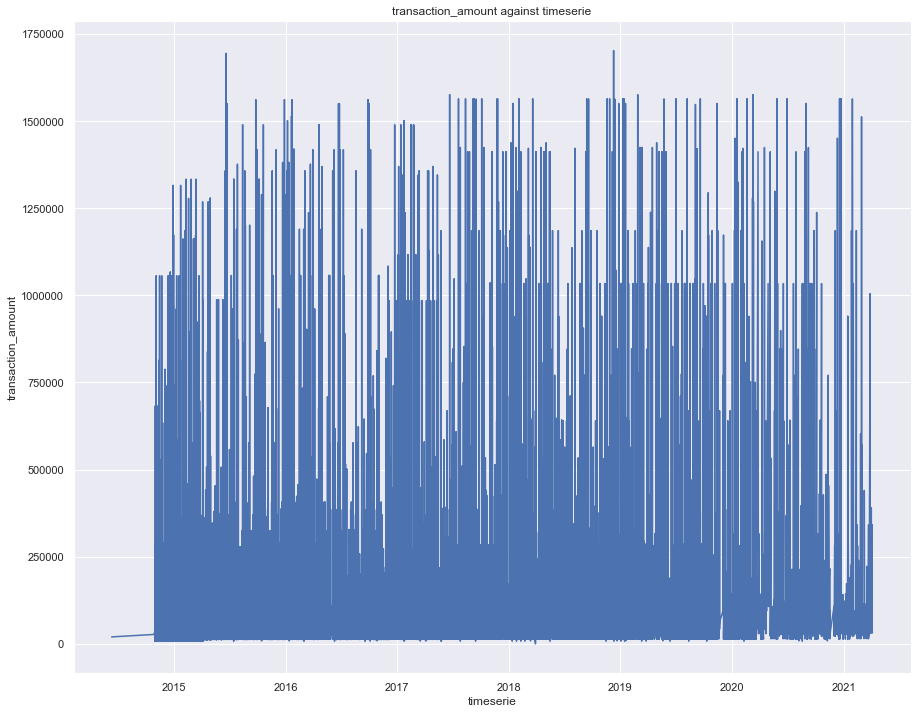

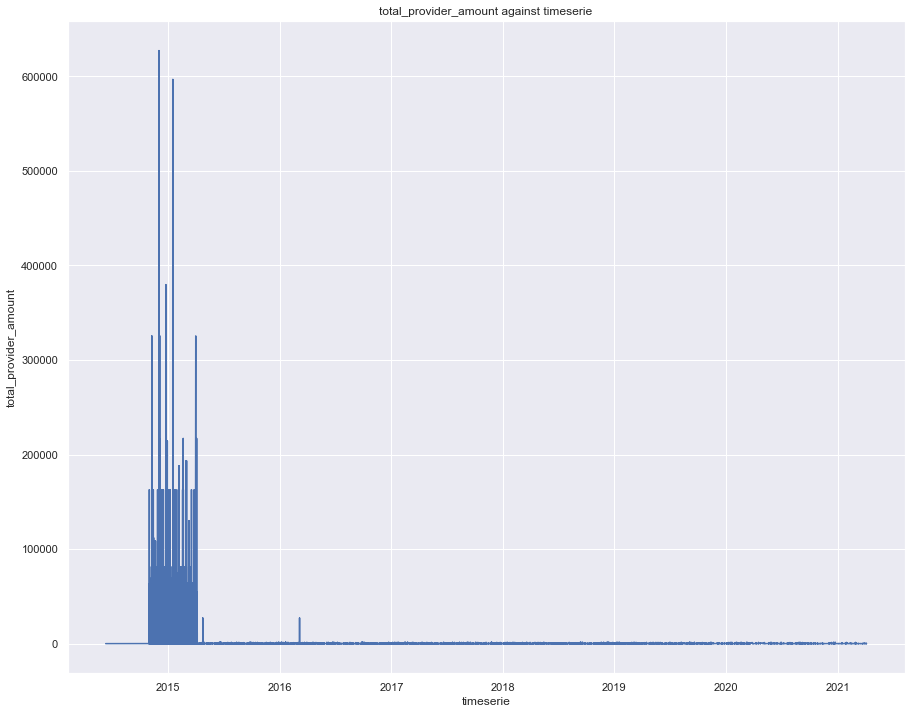

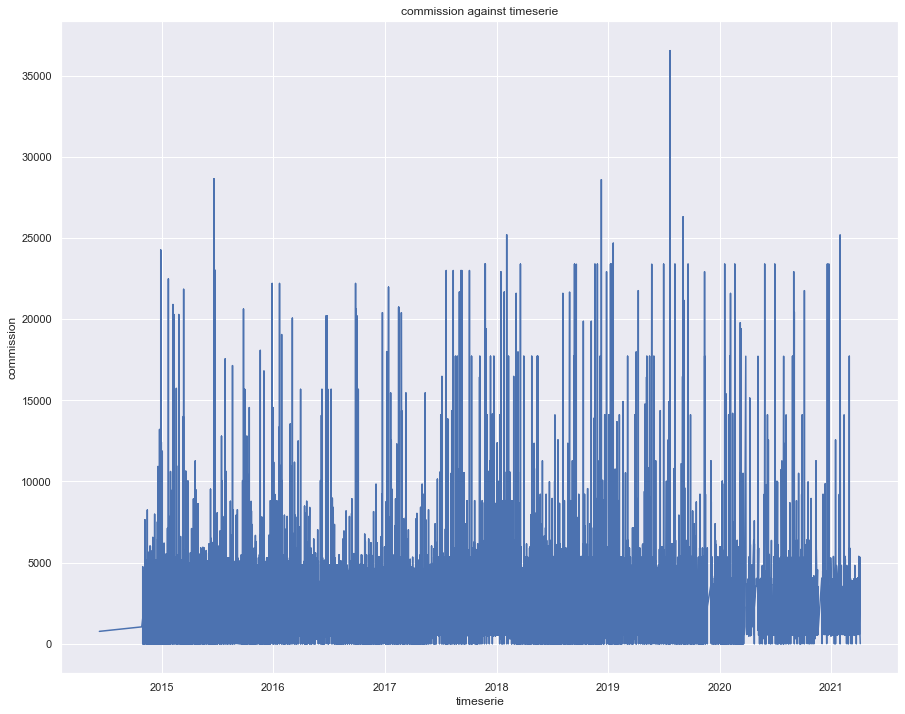

In [124]:
for feature in [ 'transaction_amount','total_provider_amount', 'commission']:
    plt.figure(figsize=(15, 12))
    plt.title(f'{feature} against timeserie')
    plt.xlabel('timeserie')
    plt.ylabel(feature)
    plt.plot(cleaned_data["transaction_date"],cleaned_data[feature])
#     plt.scatter(cleaned_data["transaction_date"],cleaned_data[feature])
    plt.show()

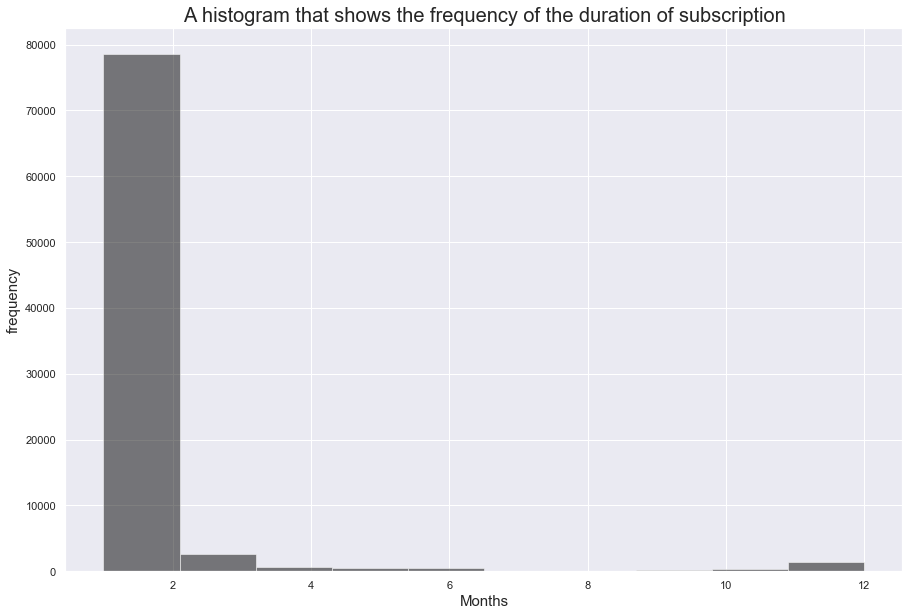

In [125]:
plt.figure(figsize=(15,10))
plt.hist(cleaned_data['duration'], facecolor='black', alpha=0.5)
plt.title("A histogram that shows the frequency of the duration of subscription",size=20)
plt.xlabel("Months",size=15)
plt.ylabel("frequency",size=15)
plt.show()

In [123]:
cleaned_data['days'] = pd.to_datetime(cleaned_data['transaction_date']).dt.day


In [52]:
cleaned_data

transaction_date  transaction_id    teller_id  provider_id  \
970          2014-06-10     401400699.0  140602043.0          1.0   
24594        2014-10-27     401418832.0  140602016.0          1.0   
24885        2014-10-30     401419060.0  140602017.0          1.0   
24886        2014-10-30     401419060.0  140602017.0          1.0   
24887        2014-10-30     401419061.0  140602017.0          1.0   
...                 ...             ...          ...          ...   
177678       2021-04-05     401535591.0  140602043.0          1.0   
177682       2021-04-05     401535595.0  140602043.0          1.0   
177683       2021-04-05     401535596.0  140602043.0          1.0   
177703       2021-04-05     401535608.0  140602043.0          1.0   
177725       2021-04-06     401535627.0  140602043.0          1.0   

        transaction_amount  total_provider_amount  commission  vat  \
970                19400.0                   22.0       757.0  0.0   
24594              26500.0                   30.0      1035.0  0.0   
24885              39700.0                   45.0      1550.0  0.0   
24886              39700.0                   45.0      1550.0  0.0   
24887              26500.0                   30.0      1035.0  0.0   
...                    ...                    ...         ...  ...   
177678            152200.0                  124.0      5332.0  0.0   
177682            100500.0                   82.0      3526.0  0.0   
177683            341000.0                  275.0       568.0  0.0   
177703             31000.0                   25.0       568.0  0.0   
177725             31000.0                   25.0         0.0  0.0   

        account_number  product_id  oder_id  duration  product_price  \
970       4.273812e+09         2.0      971       1.0          19400   
24594     4.254106e+09         3.0    24595       1.0          26500   
24885     4.288697e+09        42.0    24886       1.0          13200   
24886     4.288697e+09         3.0    24887       1.0          26500   
24887     4.105035e+09         3.0    24888       1.0          26500   
...                ...         ...      ...       ...            ...   
177678    1.045939e+09         5.0   177679       1.0         100500   
177682    1.045981e+10         5.0   177683       1.0         100500   
177683    1.020969e+10         3.0   177684      11.0          31000   
177703    1.045964e+10         3.0   177704       1.0          31000   
177725    1.025472e+10         3.0   177726       1.0          31000   

        provider_price  month  days  
970                 22      6    10  
24594               30     10    27  
24885               15     10    30  
24886               30     10    30  
24887               30     10    30  
...                ...    ...   ...  
177678              82      4     5  
177682              82      4     5  
177683              25      4     5  
177703              25      4     5  
177725              25      4     6  

[84966 rows x 16 columns]

In [53]:
cleaned_data.reset_index(drop=True,inplace=True)


In [54]:
user = cleaned_data['account_number'][64]
# print(user['account_number'])

In [55]:
lst = cleaned_data['account_number'].unique()

In [56]:
# user_df['account_number']

In [57]:
user_df = cleaned_data[cleaned_data['account_number'] == user].reset_index(drop=True)
num = user_df['account_number'][0]
pd.options.display.float_format = '{:.0f}'.format
num

136472000000.0

In [58]:
# pd.options.display.max_rows = None
user_df

transaction_date  transaction_id  teller_id  provider_id  \
0         2014-10-30       401419064  140602017            3   
1         2014-10-30       401419080  140602016            3   
2         2014-10-30       401419125  140602016            3   
3         2014-10-30       401419139  140602016            3   
4         2014-10-31       401419169  140602017            3   
..               ...             ...        ...          ...   
617       2015-04-04       401434999  140602016            3   
618       2015-04-04       401435012  140602016            3   
619       2015-04-04       401435020  140602016            3   
620       2015-04-05       401435045  140602043            3   
621       2015-04-05       401435049  140602043            3   

     transaction_amount  total_provider_amount  commission  vat  \
0                 16000                  11511         542    0   
1                 16000                  11511         542    0   
2                 16000                  11511         542    0   
3                 32000                  27119        1085    0   
4                 32000                  27119           0    0   
..                  ...                    ...         ...  ...   
617               23000                  27119        1085    0   
618               14000                  11511         542    0   
619               14000                  11511         542    0   
620               23000                  27119        1085    0   
621               50000                  54237        2169    0   

     account_number  product_id  oder_id  duration  product_price  \
0      136472000000          20    24891         1          16000   
1      136472000000          20    24909         1          16000   
2      136472000000          20    24959         1          16000   
3      136472000000          21    24972         1          32000   
4      136472000000          21    25002         1          32000   
..              ...         ...      ...       ...            ...   
617    136472000000          21    45275         1          23000   
618    136472000000          20    45293         1          14000   
619    136472000000          25    45306         1          14000   
620    136472000000          21    45338         1          23000   
621    136472000000          22    45342         1          50000   

     provider_price  month  days  
0             11511     10    30  
1             11511     10    30  
2             11511     10    30  
3             27119     10    30  
4             27119     10    31  
..              ...    ...   ...  
617           27119      4     4  
618           11511      4     4  
619           11511      4     4  
620           27119      4     5  
621           54237      4     5  

[622 rows x 16 columns]

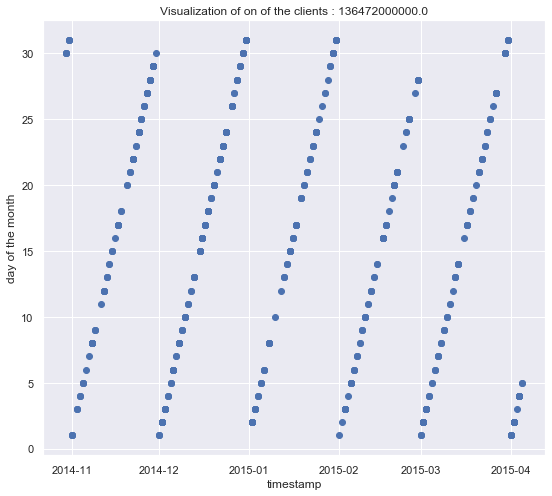

In [129]:
plt.figure(figsize=(9,8))
plt.plot(user_df['transaction_date'], user_df['days'],'o')
plt.title(f"Visualization of on of the clients : {user}")
plt.xlabel("timestamp")
plt.ylabel("day of the month")
plt.show()

In [60]:
all_clients = pd.DataFrame(cleaned_data['account_number'].unique())

In [61]:
all_clients.columns = ['clients']
cleaned_data

transaction_date  transaction_id  teller_id  provider_id  \
0           2014-06-10       401400699  140602043            1   
1           2014-10-27       401418832  140602016            1   
2           2014-10-30       401419060  140602017            1   
3           2014-10-30       401419060  140602017            1   
4           2014-10-30       401419061  140602017            1   
...                ...             ...        ...          ...   
84961       2021-04-05       401535591  140602043            1   
84962       2021-04-05       401535595  140602043            1   
84963       2021-04-05       401535596  140602043            1   
84964       2021-04-05       401535608  140602043            1   
84965       2021-04-06       401535627  140602043            1   

       transaction_amount  total_provider_amount  commission  vat  \
0                   19400                     22         757    0   
1                   26500                     30        1035    0   
2                   39700                     45        1550    0   
3                   39700                     45        1550    0   
4                   26500                     30        1035    0   
...                   ...                    ...         ...  ...   
84961              152200                    124        5332    0   
84962              100500                     82        3526    0   
84963              341000                    275         568    0   
84964               31000                     25         568    0   
84965               31000                     25           0    0   

       account_number  product_id  oder_id  duration  product_price  \
0          4273812223           2      971         1          19400   
1          4254105805           3    24595         1          26500   
2          4288697408          42    24886         1          13200   
3          4288697408           3    24887         1          26500   
4          4105035204           3    24888         1          26500   
...               ...         ...      ...       ...            ...   
84961      1045938785           5   177679         1         100500   
84962     10459812008           5   177683         1         100500   
84963     10209687929           3   177684        11          31000   
84964     10459639935           3   177704         1          31000   
84965     10254723348           3   177726         1          31000   

       provider_price  month  days  
0                  22      6    10  
1                  30     10    27  
2                  15     10    30  
3                  30     10    30  
4                  30     10    30  
...               ...    ...   ...  
84961              82      4     5  
84962              82      4     5  
84963              25      4     5  
84964              25      4     5  
84965              25      4     6  

[84966 rows x 16 columns]

In [62]:
# pd.options.display.max_rows = None
grouped_data = cleaned_data.sort_values(by='account_number').reset_index(drop=True)


In [63]:
grouped_data['date_shifted'] = grouped_data['transaction_date'].shift(periods=1)
grouped_data['days_diff'] = ( grouped_data['transaction_date']-grouped_data['date_shifted']).dt.days

In [64]:

grouped_data = grouped_data[grouped_data['days_diff']>0]
grouped_data

transaction_date  transaction_id  teller_id  provider_id  \
2           2015-06-17       401439598  140602043            1   
3           2015-07-20       401441283  140602162            1   
5           2015-07-20       401441283  140602162            1   
6           2017-10-18       401481264  140602211            1   
9           2017-07-15       401476522  140602211            1   
...                ...             ...        ...          ...   
84946       2015-03-20       401433400  140602017            3   
84947       2015-04-04       401435017  140602016            3   
84951       2015-04-04       401434994  140602016            3   
84960       2015-04-02       401434713  140602043            3   
84963       2015-11-06       401446557  140602043            1   

       transaction_amount  total_provider_amount  commission  vat  \
2                   41500                     38        1621    0   
3                   50230                     46        1725    0   
5                   50230                     46        1725    0   
6                   94000                     82        3526    0   
9                   94000                     82        3526    0   
...                   ...                    ...         ...  ...   
84946               74000                  62712        2508    0   
84947               33000                  35594        1424    0   
84951              135000                 137289        3323    0   
84960               33000                  35594        1424    0   
84963               92860                     85        3188    0   

       account_number  product_id  oder_id  duration  product_price  \
2                   0           2    51094         1          25120   
3                   0          43    53340         1          16380   
5                   0           3    53341         1          33850   
6          1010151632           5   106778         1          94000   
9          1010151632           5   100299         1          94000   
...               ...         ...      ...       ...            ...   
84946  44047300000000          23    43274         1          10000   
84947  44047300000000          21    45301         1          23000   
84951  44047300000000          21    45270         3          23000   
84960  44047300000000          21    44908         1          23000   
84963             nan          12    60485         1          12050   

       provider_price  month  days date_shifted  days_diff  
2                  23      6    17   2015-03-27         82  
3                  15      7    20   2015-06-17         33  
5                  31      7    20   2015-04-27         84  
6                  82     10    18   2015-07-20        821  
9                  82      7    15   2016-05-14        427  
...               ...    ...   ...          ...        ...  
84946            8475      3    20   2014-11-28        112  
84947           27119      4     4   2015-03-20         15  
84951           27119      4     4   2015-02-19         44  
84960           27119      4     2   2014-11-29        124  
84963              11     11     6   2014-11-06        365  

[39267 rows x 18 columns]

In [65]:
grouped_data = grouped_data.drop_duplicates(subset={'transaction_date','product_id','teller_id'}, keep='first' ).reset_index(drop=True)

In [66]:
grouped_data['date_shifted'].dropna(axis=0,inplace = True)
grouped_data = grouped_data[(grouped_data['date_shifted'].notna()) & (grouped_data['product_id'].notna())].reset_index(drop=True)

In [67]:
grouped_data.head(200)

transaction_date  transaction_id  teller_id  provider_id  \
0         2015-06-17       401439598  140602043            1   
1         2015-07-20       401441283  140602162            1   
2         2015-07-20       401441283  140602162            1   
3         2017-10-18       401481264  140602211            1   
4         2017-07-15       401476522  140602211            1   
..               ...             ...        ...          ...   
195       2015-12-23       401448925  140602162            1   
196       2016-01-28       401450898  140602016            1   
197       2016-06-25       401457432  140602162            1   
198       2015-07-15       401441090  140602043            1   
199       2017-04-20       401472705  140602016            1   

     transaction_amount  total_provider_amount  commission  vat  \
0                 41500                     38        1621    0   
1                 50230                     46        1725    0   
2                 50230                     46        1725    0   
3                 94000                     82        3526    0   
4                 94000                     82        3526    0   
..                  ...                    ...         ...  ...   
195              123400                    113        4238    0   
196             1234000                   1130        4238    0   
197               13100                     12         450    0   
198               64430                     59        2212    0   
199               57900                     53        1088    0   

     account_number  product_id  oder_id  duration  product_price  \
0                 0           2    51094         1          25120   
1                 0          43    53340         1          16380   
2                 0           3    53341         1          33850   
3        1010151632           5   106778         1          94000   
4        1010151632           5   100299         1          94000   
..              ...         ...      ...       ...            ...   
195      1013424956           6    63657         1         123400   
196      1013424956           6    66154        10         123400   
197      1013424957           1    74869         1          13100   
198      1013424994           4    53119         1          64430   
199      1013424995         100    95277         1          57900   

     provider_price  month  days date_shifted  days_diff  
0                23      6    17   2015-03-27         82  
1                15      7    20   2015-06-17         33  
2                31      7    20   2015-04-27         84  
3                82     10    18   2015-07-20        821  
4                82      7    15   2016-05-14        427  
..              ...    ...   ...          ...        ...  
195             113     12    23   2015-11-27         26  
196             113      1    28   2015-12-23         36  
197              12      6    25   2015-02-06        505  
198              59      7    15   2015-04-14         92  
199              53      4    20   2015-07-15        645  

[200 rows x 18 columns]

In [68]:
grouped_data.drop(columns="transaction_date")

transaction_id  teller_id  provider_id  transaction_amount  \
0           401439598  140602043            1               41500   
1           401441283  140602162            1               50230   
2           401441283  140602162            1               50230   
3           401481264  140602211            1               94000   
4           401476522  140602211            1               94000   
...               ...        ...          ...                 ...   
20290       401431344  140602016            3               42000   
20291       401425216  140602043            3               42000   
20292       401431837  140602016            3               54000   
20293       401427444  140602016            3               74000   
20294       401434713  140602043            3               33000   

       total_provider_amount  commission  vat  account_number  product_id  \
0                         38        1621    0               0           2   
1                         46        1725    0               0          43   
2                         46        1725    0               0           3   
3                         82        3526    0      1010151632           5   
4                         82        3526    0      1010151632           5   
...                      ...         ...  ...             ...         ...   
20290                  35594        1424    0  44047300000000          23   
20291                  35594        1424    0  44047300000000          23   
20292                  45763        1831    0  44047300000000          23   
20293                  62712        2508    0  44047300000000          23   
20294                  35594        1424    0  44047300000000          23   

       oder_id  duration  product_price  provider_price  month  days  \
0        51094         1          25120              23      6    17   
1        53340         1          16380              15      7    20   
2        53341         1          33850              31      7    20   
3       106778         1          94000              82     10    18   
4       100299         1          94000              82      7    15   
...        ...       ...            ...             ...    ...   ...   
20290    40705         1          10000            8475      2    27   
20291    32674         1          10000            8475     12    28   
20292    41331         1          10000            8475      3     3   
20293    35524         1          10000            8475      1    19   
20294    44907         1          10000            8475      4     2   

      date_shifted  days_diff  
0       2015-03-27         82  
1       2015-06-17         33  
2       2015-04-27         84  
3       2015-07-20        821  
4       2016-05-14        427  
...            ...        ...  
20290   2015-01-23         35  
20291   2014-11-14         44  
20292   2015-02-27          4  
20293   2014-12-19         31  
20294   2015-01-19         73  

[20295 rows x 17 columns]

In [69]:
grouped_data.describe(include="all")

transaction_date  transaction_id  teller_id  provider_id  \
count             20295           20295      20295        20295   
unique             2167             nan        nan          nan   
top          2015-04-04             nan        nan          nan   
freq                 34             nan        nan          nan   
mean                NaN       401477103  140602105            1   
std                 NaN           29984         97            0   
min                 NaN       401419516  140602008            1   
25%                 NaN       401452434  140602043            1   
50%                 NaN       401477015  140602043            1   
75%                 NaN       401501313  140602211            1   
max                 NaN       401535627  140602268            3   

        transaction_amount  total_provider_amount  commission   vat  \
count                20295                  20295       20295 20295   
unique                 nan                    nan         nan   nan   
top                    nan                    nan         nan   nan   
freq                   nan                    nan         nan   nan   
mean                 99789                   1431        2494     0   
std                 168920                   9546        2236     0   
min                   7000                      0           0     0   
25%                  32000                     31         862     0   
50%                  68800                     70        2279     0   
75%                 106600                     95        3526     0   
max                1702800                 627120       28595     0   

        account_number  product_id  oder_id  duration  product_price  \
count            20295       20295    20295     20295          20295   
unique             nan         nan      nan       nan            nan   
top                nan         nan      nan       nan            nan   
freq               nan         nan      nan       nan            nan   
mean      221256355417          20   101101         1          44837   
std      1941079160447          29    39723         2          33666   
min                  0           1    25366         1           7000   
25%         4135518339           3    68164         1          13800   
50%         4286915203           5   100955         1          32000   
75%        10254722605          21   133190         1          64430   
max     44047300000000         101   177726        12         139000   

        provider_price  month  days date_shifted  days_diff  
count            20295  20295 20295        20295      20295  
unique             nan    nan   nan         1914        nan  
top                nan    nan   nan   2014-11-21        nan  
freq               nan    nan   nan          110        nan  
mean               972      6    15          NaN        377  
std               4996      4     9          NaN        363  
min                  0      1     1          NaN          1  
25%                 12      3     8          NaN         94  
50%                 30      6    15          NaN        258  
75%                 82     10    23          NaN        551  
max              54237     12    31          NaN       2267

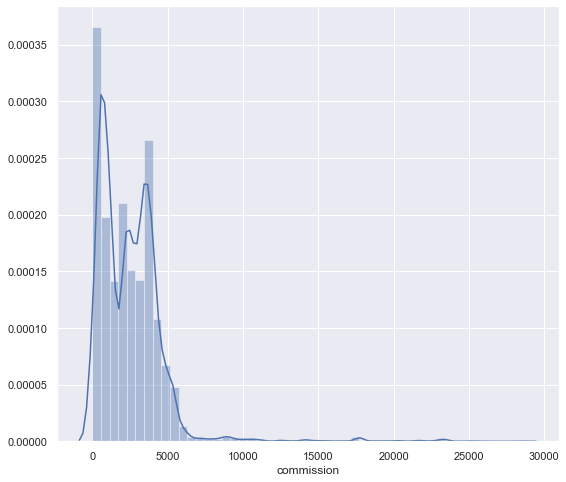

In [70]:
plt.figure(figsize=(9,8))
sns.distplot(grouped_data['commission'])
plt.show()

## 


In [71]:
targets = grouped_data['days_diff']
vals = grouped_data.iloc[:,:-1]
vals = grouped_data[['transaction_id', 'teller_id', 'provider_id',
       'transaction_amount', 'total_provider_amount', 'commission',
       'account_number', 'product_id', 'oder_id', 'duration', 'product_price',
       'provider_price', 'month', 'days', 'days_diff']]

In [72]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [73]:
forward_regression(vals,targets,0.05,verbose=True)

C:\Users\Kamuzinzi N. Egide\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


Add  oder_id                        with p-value 0.0
Add  days_diff                      with p-value 0.0
Add  account_number                 with p-value 0.0
Add  teller_id                      with p-value 3.94958e-07


['oder_id', 'days_diff', 'account_number', 'teller_id']

In [74]:
X = grouped_data[['oder_id',
 'days_diff',
 'duration',
 'transaction_amount',
 'account_number',
 'transaction_id','month']]

In [75]:
X

oder_id  days_diff  duration  transaction_amount  account_number  \
0        51094         82         1               41500               0   
1        53340         33         1               50230               0   
2        53341         84         1               50230               0   
3       106778        821         1               94000      1010151632   
4       100299        427         1               94000      1010151632   
...        ...        ...       ...                 ...             ...   
20290    40705         35         1               42000  44047300000000   
20291    32674         44         1               42000  44047300000000   
20292    41331          4         1               54000  44047300000000   
20293    35524         31         1               74000  44047300000000   
20294    44907         73         1               33000  44047300000000   

       transaction_id  month  
0           401439598      6  
1           401441283      7  
2           401441283      7  
3           401481264     10  
4           401476522      7  
...               ...    ...  
20290       401431344      2  
20291       401425216     12  
20292       401431837      3  
20293       401427444      1  
20294       401434713      4  

[20295 rows x 7 columns]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X,targets, test_size=0.2, random_state = 365 )

In [77]:
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_hat = reg.predict(x_train)

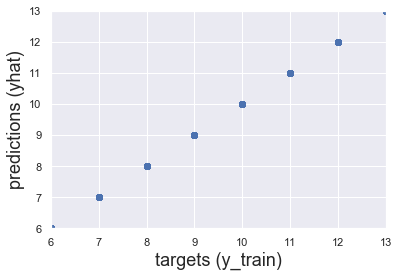

In [79]:
plt.scatter(y_train,y_hat)
plt.xlabel('targets (y_train)', size=18)
plt.ylabel('predictions (yhat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

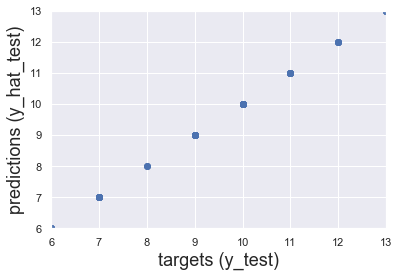

In [80]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel('targets (y_test)', size=18)
plt.ylabel('predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

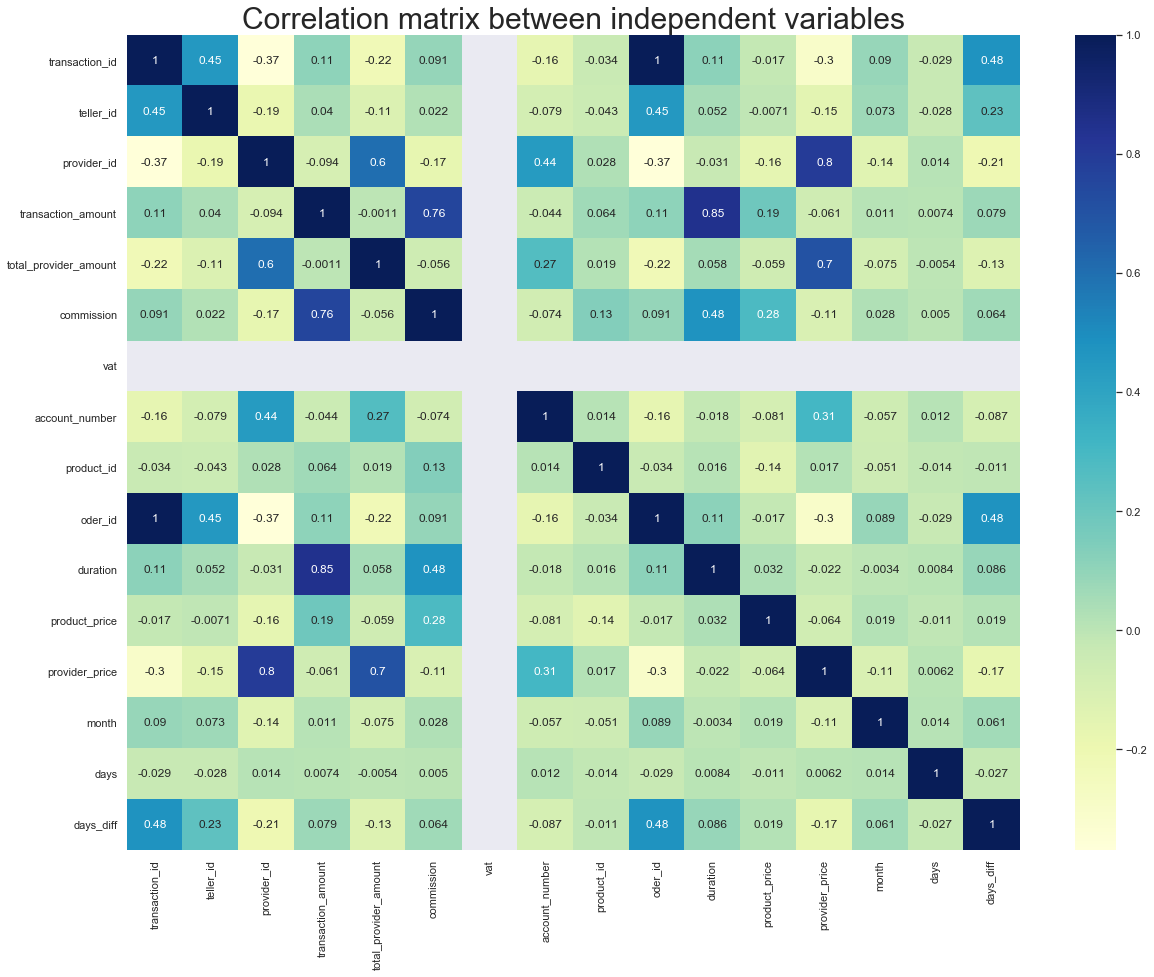

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(grouped_data.corr(), annot=True,cmap="YlGnBu")
plt.title("Correlation matrix between independent variables", fontsize= 30)
plt.show()

In [82]:
grouped_data.iloc[:,:-1]

transaction_date  transaction_id  teller_id  provider_id  \
0           2015-06-17       401439598  140602043            1   
1           2015-07-20       401441283  140602162            1   
2           2015-07-20       401441283  140602162            1   
3           2017-10-18       401481264  140602211            1   
4           2017-07-15       401476522  140602211            1   
...                ...             ...        ...          ...   
20290       2015-02-27       401431344  140602016            3   
20291       2014-12-28       401425216  140602043            3   
20292       2015-03-03       401431837  140602016            3   
20293       2015-01-19       401427444  140602016            3   
20294       2015-04-02       401434713  140602043            3   

       transaction_amount  total_provider_amount  commission  vat  \
0                   41500                     38        1621    0   
1                   50230                     46        1725    0   
2                   50230                     46        1725    0   
3                   94000                     82        3526    0   
4                   94000                     82        3526    0   
...                   ...                    ...         ...  ...   
20290               42000                  35594        1424    0   
20291               42000                  35594        1424    0   
20292               54000                  45763        1831    0   
20293               74000                  62712        2508    0   
20294               33000                  35594        1424    0   

       account_number  product_id  oder_id  duration  product_price  \
0                   0           2    51094         1          25120   
1                   0          43    53340         1          16380   
2                   0           3    53341         1          33850   
3          1010151632           5   106778         1          94000   
4          1010151632           5   100299         1          94000   
...               ...         ...      ...       ...            ...   
20290  44047300000000          23    40705         1          10000   
20291  44047300000000          23    32674         1          10000   
20292  44047300000000          23    41331         1          10000   
20293  44047300000000          23    35524         1          10000   
20294  44047300000000          23    44907         1          10000   

       provider_price  month  days date_shifted  
0                  23      6    17   2015-03-27  
1                  15      7    20   2015-06-17  
2                  31      7    20   2015-04-27  
3                  82     10    18   2015-07-20  
4                  82      7    15   2016-05-14  
...               ...    ...   ...          ...  
20290            8475      2    27   2015-01-23  
20291            8475     12    28   2014-11-14  
20292            8475      3     3   2015-02-27  
20293            8475      1    19   2014-12-19  
20294            8475      4     2   2015-01-19  

[20295 rows x 17 columns]

In [83]:
xsm = X
ysm = targets
x1 = sm.add_constant(xsm)
results = sm.OLS(ysm,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              days_diff   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.438e+23
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        21:36:33   Log-Likelihood:             3.1555e+05
No. Observations:               20295   AIC:                        -6.311e+05
Df Residuals:                   20288   BIC:                        -6.310e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.527e-11   1.22e-18   4.54e+07      0.000    5.53e-11    5.53e-11
oder_id             1.035e-14   8.75e-15      1.182      0.237   -6.81e-15    2.75e-14
days_diff              1.0000   9.43e-13   1.06e+12      0.000       1.000       1.000
duration           -1.217e-13    3.6e-10     -0.000      1.000   -7.06e-10    7.06e-10
transaction_amount -2.604e-16   3.35e-15     -0.078      0.938   -6.82e-15     6.3e-15
account_number     -2.032e-20   1.57e-22   -129.244      0.000   -2.06e-20      -2e-20
transaction_id     -3.244e-17   2.46e-18    -13.201      0.000   -3.73e-17   -2.76e-17
month               1.527e-15   8.36e-11   1.83e-05      1.000   -1.64e-10    1.64e-10
==============================================================================
Omnibus:                    35071.093   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32829771.959
Skew:                          12.247   Prob(JB):                         0.00
Kurtosis:                     198.507   Cond. No.                     4.52e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+18. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, targets)

In [131]:
# create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# h = (x_max / x_min)/100
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#  np.arange(y_min, y_max, h))